Enter 1 for image classification using Gaussian mixture modal1
Enter the number of mixture components to be used in each Gaussian: 
2
Enter the Covariance type to be used:
 1)full=each component has its own general covariance matrix
 2)tied=all components share the same general covariance matrix 
 3)diag=each component has its own diagonal covariance m,atrix 
 4)spherical=each component has its own single variance 
1
             precision    recall  f1-score   support

        0.0       0.12      0.06      0.08        50
        1.0       0.42      0.82      0.56        50
        2.0       0.61      0.34      0.44        50

avg / total       0.38      0.41      0.36       150

The confusion Matrix is
[[ 3 37 10]
 [ 8 41  1]
 [14 19 17]]
The accuracy is 
40.666666666666664


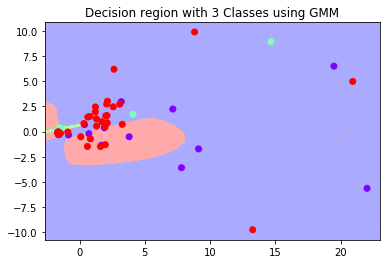

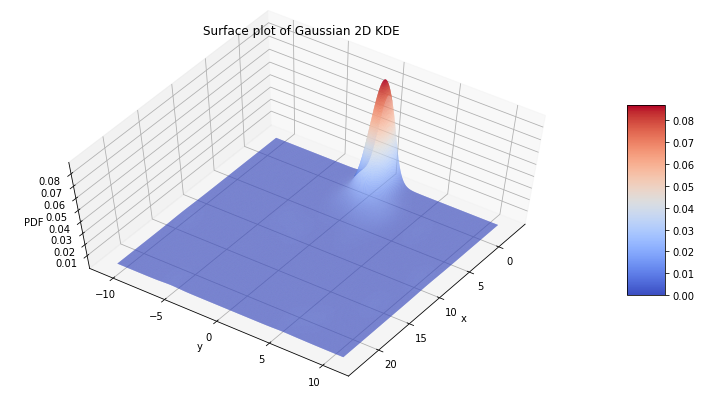

In [12]:
# Program to classify 2D data using Unimodal Gaussian and GMM
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import mixture
import sklearn
from sklearn.metrics import classification_report

cmap_1 = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']) # To be used in plots
cmap_2 = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_3= ListedColormap(['#FFFF00', '#80FF0F', '#0000FF'])
cmap_4=ListedColormap(['red', 'blue', 'cyan'])


Nc=3 # Number of class
NGMM_comp= 10  # Number of components for GMM

d=int(input('Enter 1 for image classification using Gaussian mixture modal'))
#2)Interlock 3)Ring 4)Spiral \n'))

def classify_data(X, classifiers):
    y_pred = np.argmax([classifiers[j].score_samples(X) for j in range(0,Nc)],0)
    return y_pred


y=[]
Y=np.empty([0,1])
X=np.empty([0,2])

if d==1:
    path="C:/Users/Govind/Downloads/02-Govind/group02/dataset/gmm/"

    
NGMM_comp=int(input('Enter the number of mixture components to be used in each Gaussian: \n'))

Cov_type=int(input('Enter the Covariance type to be used:\n 1)full=each component has its own general covariance matrix\n 2)tied=all components share the same general covariance matrix \n 3)diag=each component has its own diagonal covariance m,atrix \n 4)spherical=each component has its own single variance \n'))

if Cov_type==1:
    C='full'
elif Cov_type==2:
    C='tied'
elif Cov_type==3:
    C='diag'
else:
    C='spherical'
classifiers = [[] for i in range(0,Nc)]
for i in range(0,Nc):
    classifiers[i]=mixture.GaussianMixture(n_components=NGMM_comp,covariance_type=C)
    #'full'=each component has its own general covariance matrix
    #'tied'=all components share the same general covariance matrix
    #'diag'=each component has its own diagonal covariance m,atrix
    #'spherical'=each component has its own single variance


    Xx=pd.read_csv(path+"class"+str(i+1)+"_train_2D.txt",header = None, delimiter=',', usecols=(0,1))
    Xx=np.array(Xx)
    classifiers[i].fit(Xx)
    
    m,n=Xx.shape
    y=i*np.ones((m,1))    
    X=np.concatenate((X,Xx))
    Y=np.concatenate((Y,y))
    
h = 0.05 # Grid size

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classify_data(np.c_[xx.ravel(), yy.ravel()],classifiers)
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx, yy, Z, cmap=cmap_1)
plt.scatter(X[:,0],X[:,1], c=Y.ravel(), cmap='rainbow')
plt.title('Decision region with '+str(Nc)+' Classes using GMM')
 
    
###################################################

from mpl_toolkits.mplot3d import axes3d
import scipy.stats as st
x = X[:, 0]
y = X[:, 1]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

##########################################################


# For Accuracy and CM
x_test=np.empty((0,2))
y_test=np.empty((0,1))

for i in range(0,Nc):
    
    temp=pd.read_csv(path+"class"+str(i+1)+"_test_2D.txt",header = None, delimiter=',', usecols=(0,1))
    temp=np.array(temp)
    m,n=temp.shape
    ytemp=i*np.ones((m,1))
    x_test=np.concatenate((x_test,temp))
    y_test=np.concatenate((y_test,ytemp))
    
y_pred = classify_data(x_test, classifiers) 
conf_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("The confusion Matrix is")
print(conf_mat)
print("The accuracy is ")
print (accuracy*100)
